# Euler-Mayurama method to approximate Stochastic Differentiel Equation (SDE)

#### *Author : Hugo Michel*

Solving SDEs can be tricky because of the randomness involved. The Euler-Maruyama method is a way to get an approximate solution to these equations. It's like using a simplified version of the equations that's easier to handle.

The Euler-Maruyama method is a numerical scheme to approximate the solution of Geometric Brownian Motion SDE. The method is an extension of the classical Euler method used for ordinary differential equations.

EM method is like taking small steps forward while considering both the expected changes and the random surprises that might happen along the way. EM take into account of random fluctuations at each step by introducing the Wiener process. 

In the context of asset pricing, we suggest to use the Euler-Maruyama method to generate a signal that satisfy the Black and Scholes model, using the Itô stochastic integral:

$$
dV_t = \mu SV_t dt + \sigma V_t dW_t
$$

where:
* V$_t$ represent the state of the system at time $t$ 
* $dW$ represent is an increment of a Wiener process (Brownian motion), representing the random fluctuations.

To numerically approximate the solution of the SDE, we discretize it over small time intervals. Given a time step size $\Delta_t$, we divide the time interval into smaller steps. Let's denote the time steps as $t_0, t_1, t_2, t_3,\text{...},t_n$ where $t_{j+1} = t_j + \Delta_t$

The EM method approximates the solution of the SDE by iterating over these small time steps. At each step $t_j$ it updates the state Value of the option $V_t$ using the following formula:


$$V_j = V_{j-1} + \mu V_{j-1} \Delta_t + \sigma V_{j-1} \Delta W_t$$

$$V_j = V_{j-1} + \mu V_{j-1} [t_j - t_{j-1}] + \sigma V_{j-1} [W(t_j) - W(t_{j-1})]$$

where: 
* $t_j - t_{j-1} = \Delta_t$
* $W(t_{j-1 + dt}) - W(t_{j-1}) = \Delta W_t$
* $\mu V_{j-1} dt$ is the deterministic drift term
* $\sigma V_{j-1} [W(t_{j-1 + dt}) - W(t_{j-1})]$ is the stochastic term

We repeat this process for each time step, udpating the state of the system based on a deterministic drift term $\mu V_{j-1} \Delta_t$ and stochastic term $\sigma V_{j-1} \Delta W_t$

With the properties of a Wiener process, we can be demonstrated that $W(t_{j-1)}=W(dt) \approx \frac{\hat{W}(Ndt)}{\sqrt{N}}$ with \hat{W} a piecewise linear function of the interpolation of a random fortune.

Here to approximate a Wiener process for a period $T$ decomposed in $M$ time steps, we create a fortune RW of a given length. At each point $x$, we find the position just before and just after and approximate our Wiener process with a linear interpolation and we use the property that $\hat{W}(\frac{T}{N}j) = \sqrt{\frac{T}{N}}\hat{W}_{\frac{T}{N}}(j)$

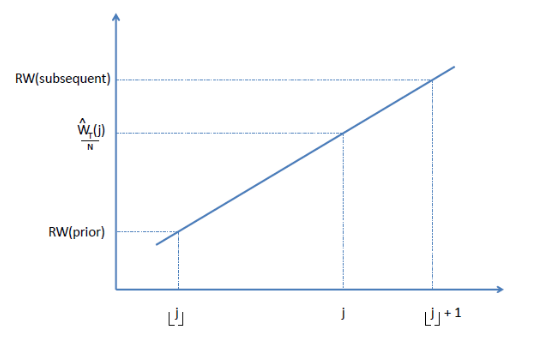

$$
\frac{\hat{W}_{\frac{T}{N}}(j) - RW(prior)}{j - |j|} = \frac{RW(subsequent) - RW(prior)}{|j| + 1 - |j|}
$$


This code is an implementation of the Euler-Maruyama (EM) method for the numerical solution of a Stochastic Differential Equation (SDE). 
SDEs describe the dynamics that govern the time-evolution of systems subjected to deterministic and random influences.

In [22]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

### Define variables

In [23]:
# Number of simulations
num_sims = 1000

# Number of points in partition
N = 100

# Initial value
X_0 = 1
Y_0 = X_0

# Starting time
t_0 = 0

# Ending time
T = 50

# SDE for GBM: dX_t = mu_0*X_t dt + sigma_0*X_t dB_t
mu_0 = 0.2
sigma_0 = 0.21

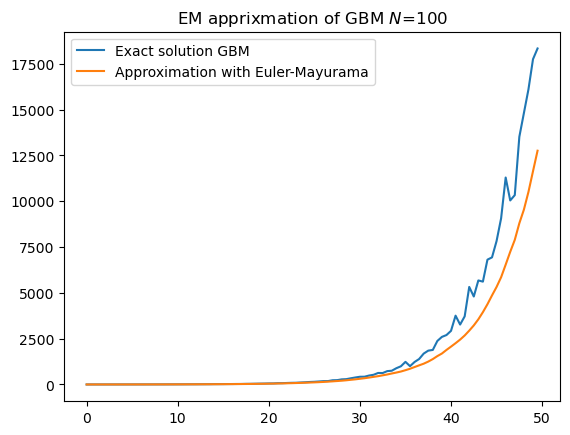

In [24]:
# Time increments
dt = float(T - t_0) / N

# Times 
t = np.arange(t_0, T, dt) 

# Brownian increments
dB = np.zeros(N)
dB[0] = 0

# Brownian samples
B = np.zeros(N)
B[0] = 0

# Simulated process
X = np.zeros(N) 
X[0] = 1

# Approximated process
Y    = np.zeros(N)
Y[0] = Y_0

# Sample means across all simulations
SX = np.zeros(N)
SY = np.zeros(N)

# Iterate
for n in range(num_sims):
    for i in range(1, t.size):
        # Generate dB_t
        dB[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
        
        # Generate B_t
        B[i] = np.random.normal(loc = 0.0, scale = np.sqrt(t[i]))
        
        # Simulate (blue)
        X[i] = X_0 * np.exp( (mu_0 - 0.5 * sigma_0*sigma_0)*(i * dt) + (float(sigma_0) * B[i] ))
        # Compute the average price
        SX[i] = SX[i] + X[i]/num_sims
        
        # Approximate (green)
        Y[i] = Y[i-1] + (mu_0 * Y[i-1]) * dt + (sigma_0 * Y[i-1]) * dB[i]
        # Compute the avarage price
        SY[i] = SY[i] + Y[i]/num_sims
    
# Plot
plt.plot(t, SX, label="Exact solution GBM")
plt.plot(t, SY, label="Approximation with Euler-Mayurama")
plt.title("EM apprixmation of GBM $N$="+str(N))
plt.legend()
plt.show()

Please note that if we take infinitesimal step size, in other word if $\Delta_t \rightarrow 0$, EM method converges to the true solution of the SDE. It knows as weak convergence. 

To do so we can increase value of $N$ such as $\Delta_t$ is close to 0

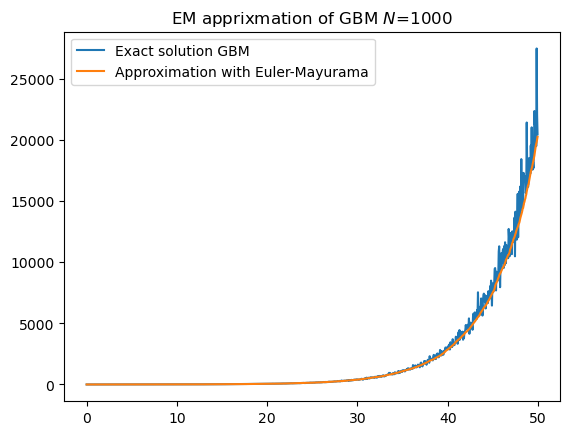

In [25]:
N = 1000 # modify the value of N to see how N affect the result

# Time increments
dt = float(T - t_0) / N

# Times 
t = np.arange(t_0, T, dt) 

# Brownian increments
dB = np.zeros(N)
dB[0] = 0

# Brownian samples
B = np.zeros(N)
B[0] = 0

# Simulated process
X = np.zeros(N) 
X[0] = 1

# Approximated process
Y    = np.zeros(N)
Y[0] = Y_0

# Sample means across all simulations
SX = np.zeros(N)
SY = np.zeros(N)

# Iterate
for n in range(num_sims):
    for i in range(1, t.size):
        # Generate dB_t
        dB[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
        
        # Generate B_t
        B[i] = np.random.normal(loc = 0.0, scale = np.sqrt(t[i]))
        
        # Simulate (blue)
        X[i] = X_0 * np.exp( (mu_0 - 0.5 * sigma_0*sigma_0)*(i * dt) + (float(sigma_0) * B[i] ))
        # Compute the average price
        SX[i] = SX[i] + X[i]/num_sims
        
        # Approximate (green)
        Y[i] = Y[i-1] + (mu_0 * Y[i-1]) * dt + (sigma_0 * Y[i-1]) * dB[i]
        # Compute the avarage price
        SY[i] = SY[i] + Y[i]/num_sims
    
# Plot
plt.plot(t, SX, label="Exact solution GBM")
plt.plot(t, SY, label="Approximation with Euler-Mayurama")
plt.title("EM apprixmation of GBM $N$="+str(N))
plt.legend()
plt.show()